In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('results.csv')
results = pd.read_csv('results.csv')

data=pd.read_csv('normalized_text_without_outliers.csv')
label_encoder = LabelEncoder()
category_labels = label_encoder.fit_transform(data['category'])
true_labels = category_labels


results.head()


,K-means,Hierarchical,DBSCAN,GMM,Spectral
0,2,1,0,3,1
1,2,1,0,3,1
2,2,1,0,3,1
3,2,1,0,3,1
4,2,1,0,3,1


####  Purity, Inverse Purity, F measure

In [14]:
import numpy as np

# Initialization of the evaluation results table
evaluation_results = pd.DataFrame(columns=['Algorithm', 'Purity', 'Inverse Purity', 'F measure'])

# Create a map that maps unique cluster labels to non-negative numbers
cluster_mapping = {cluster_label: idx for idx, cluster_label in enumerate(np.unique(results.values))}

# evaluation for each algorithm
for column in results.columns:
    # Get the cluster labels from the column and map them to non-negative values
    labels = results[column].map(cluster_mapping)
    
    # Counting Purity
    purity = 0
    n = len(category_labels)
    for cluster_id in np.unique(labels):
        cluster_indices = np.where(labels == cluster_id)[0]
        cluster_category_labels = category_labels[cluster_indices]
        majority_category = np.bincount(cluster_category_labels).argmax()
        purity += np.sum(cluster_category_labels == majority_category)
    purity /= n
    
    # Counting Inverse Purity
    inverse_purity = 0
    for category_id in np.unique(category_labels):
        category_indices = np.where(category_labels == category_id)[0]
        category_cluster_labels = labels[category_indices]
        majority_cluster = np.bincount(category_cluster_labels).argmax()
        inverse_purity += np.sum(category_cluster_labels == majority_cluster)
    inverse_purity /= n
    
    # Counting F measure
    f_measure = 2 * (purity * inverse_purity) / (purity + inverse_purity)
    
    # table with evaluation results
    new_row = pd.DataFrame({'Algorithm': column, 'Purity': purity, 'Inverse Purity': inverse_purity, 'F measure': f_measure}, index=[0])
    evaluation_results = pd.concat([evaluation_results, new_row], ignore_index=True)


print(evaluation_results)



      Algorithm    Purity  Inverse Purity  F measure
0       K-means  0.914246        0.914246   0.914246
1  Hierarchical  0.887967        0.887967   0.887967
2        DBSCAN  0.608114        0.826648   0.700738
3           GMM  0.910558        0.910558   0.910558
4      Spectral  0.739972        0.882895   0.805140


C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2533473595.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis", len(evaluation_results["Algorithm"]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


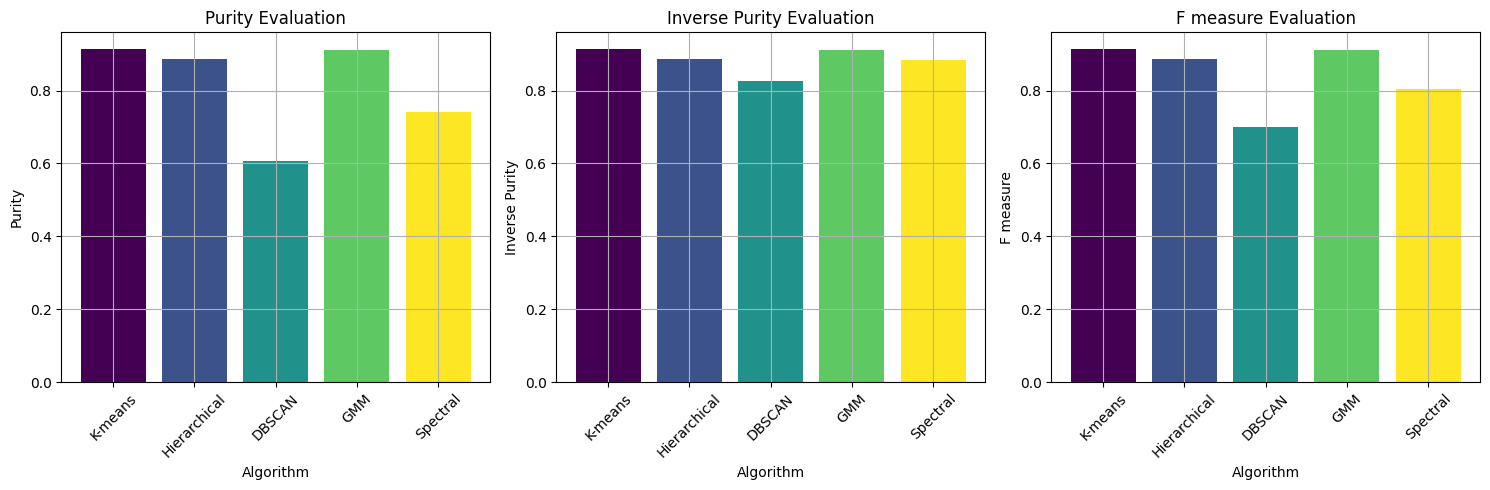

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cmap = cm.get_cmap("viridis", len(evaluation_results["Algorithm"]))

metrics_to_plot = ["Purity", "Inverse Purity", "F measure"]
for idx, metric in enumerate(metrics_to_plot):
    ax = axs[idx]
    
    # For each clustering method we use colors from the "viridis" palette
    for i, algorithm in enumerate(evaluation_results["Algorithm"]):
        ax.bar(i, evaluation_results[metric][i], color=cmap(i))
    
    ax.set_xlabel("Algorithm")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} Evaluation")
    ax.set_xticks(range(len(evaluation_results["Algorithm"])))
    ax.set_xticklabels(evaluation_results["Algorithm"], rotation=45)
    ax.grid(True)
    ax.legend().set_visible(False) 

plt.tight_layout()
plt.show()


#### Rand Statistic, Jaccard Coefficient, Folkes and Mallows Metric

C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2753969871.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Algorithm': column, 'Rand Statistic': rand_statistic,
C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2753969871.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Algorithm': column, 'Rand Statistic': rand_statistic,
C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2753969871.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Algorithm': column, 'Rand Statistic': rand_statistic,
C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2753969871.py:38: FutureWarning:

      Algorithm  Rand Statistic  Jaccard Coefficient  \
0       K-means        0.803730             0.729447   
1  Hierarchical        0.756708             0.675573   
2        DBSCAN        0.468980             0.422121   
3           GMM        0.794615             0.718809   
4      Spectral        0.573435             0.506843   

   Folkes and Mallows Metric  
0                   0.843562  
1                   0.806387  
2                   0.600925  
3                   0.836404  
4                   0.679929  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


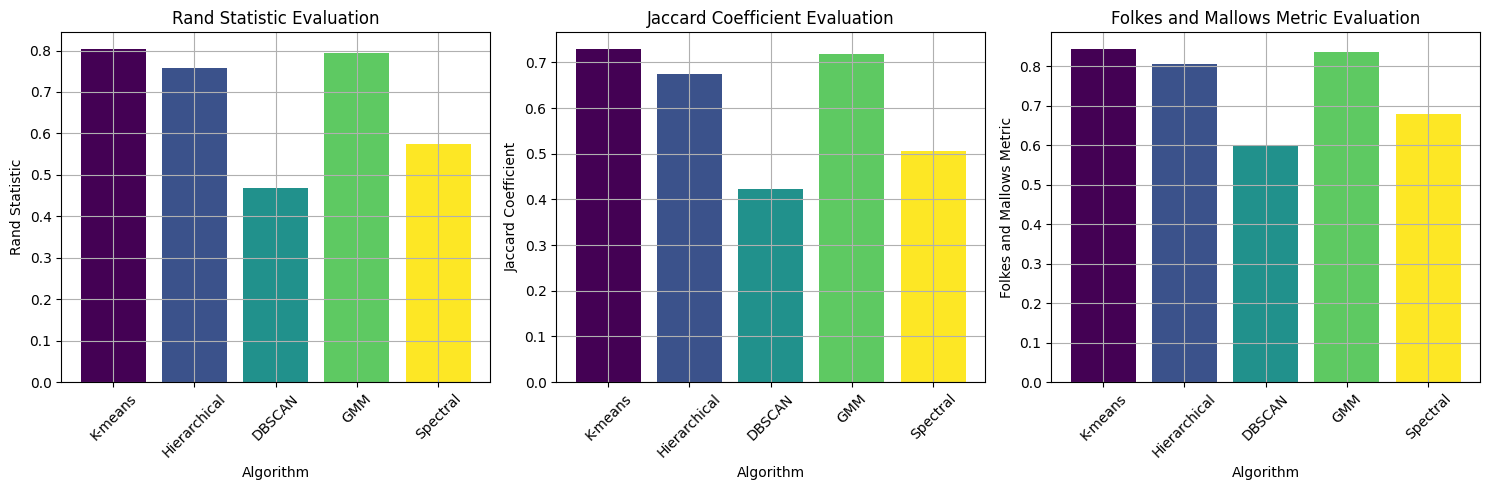

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# table with results
evaluation_results = pd.DataFrame(columns=['Algorithm', 'Rand Statistic', 'Jaccard Coefficient', 'Folkes and Mallows Metric'])

# Create a map that maps unique cluster labels to non-negative numbers
cluster_mapping = {cluster_label: idx for idx, cluster_label in enumerate(np.unique(results.values))}

# for each algorithm
for column in results.columns:
    # Get the cluster labels from the column and map them to non-negative values
    labels = results[column].map(cluster_mapping)
    
    # Counting Rand Statistic
    rand_statistic = adjusted_rand_score(category_labels, labels)
    
    # Counting Jaccard Coefficient
    intersection = 0
    union = 0

    for i in range(len(category_labels)):
        for j in range(i+1, len(category_labels)):
            if (category_labels[i] == category_labels[j]) and (labels[i] == labels[j]):
                intersection += 1
            if (category_labels[i] == category_labels[j]) or (labels[i] == labels[j]):
                union += 1

    jaccard_coefficient = intersection / union
    
    # Counting Folkes and Mallows Metric
    folkes_mallows_metric = fowlkes_mallows_score(category_labels, labels)
    
    # adding to table with results
    evaluation_results = evaluation_results.append({'Algorithm': column, 'Rand Statistic': rand_statistic,
                                                    'Jaccard Coefficient': jaccard_coefficient,
                                                    'Folkes and Mallows Metric': folkes_mallows_metric},
                                                   ignore_index=True)

print(evaluation_results)


#--------plots---------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cmap = cm.get_cmap("viridis", len(evaluation_results["Algorithm"]))
metrics_to_plot = ["Rand Statistic", "Jaccard Coefficient", "Folkes and Mallows Metric"]
for idx, metric in enumerate(metrics_to_plot):
    ax = axs[idx]
    
    for i, algorithm in enumerate(evaluation_results["Algorithm"]):
        ax.bar(i, evaluation_results[metric][i], color=cmap(i))
    
    ax.set_xlabel("Algorithm")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} Evaluation")
    ax.set_xticks(range(len(evaluation_results["Algorithm"])))
    ax.set_xticklabels(evaluation_results["Algorithm"], rotation=45)
    ax.grid(True)
    ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


#### Class Entropy, Mutual Information

C:\Users\julia\AppData\Local\Temp\ipykernel_20148\1789664501.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entropy_mi_results = entropy_mi_results.append({'Algorithm': column, 'Class Entropy': class_entropy_value,
C:\Users\julia\AppData\Local\Temp\ipykernel_20148\1789664501.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entropy_mi_results = entropy_mi_results.append({'Algorithm': column, 'Class Entropy': class_entropy_value,
C:\Users\julia\AppData\Local\Temp\ipykernel_20148\1789664501.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entropy_mi_results = entropy_mi_results.append({'Algorithm': column, 'Class Entropy': class_entropy_value,
C:\Users\julia\AppData\Local\Temp\ipykernel_20148\1789664501.py:34: Fu

      Algorithm  Class Entropy  Mutual Information
0       K-means       0.352869            0.779145
1  Hierarchical       0.414111            0.742466
2        DBSCAN       0.708015            0.583170
3           GMM       0.359972            0.775373
4      Spectral       0.599301            0.662291


C:\Users\julia\AppData\Local\Temp\ipykernel_20148\1789664501.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis", len(entropy_mi_results["Algorithm"]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


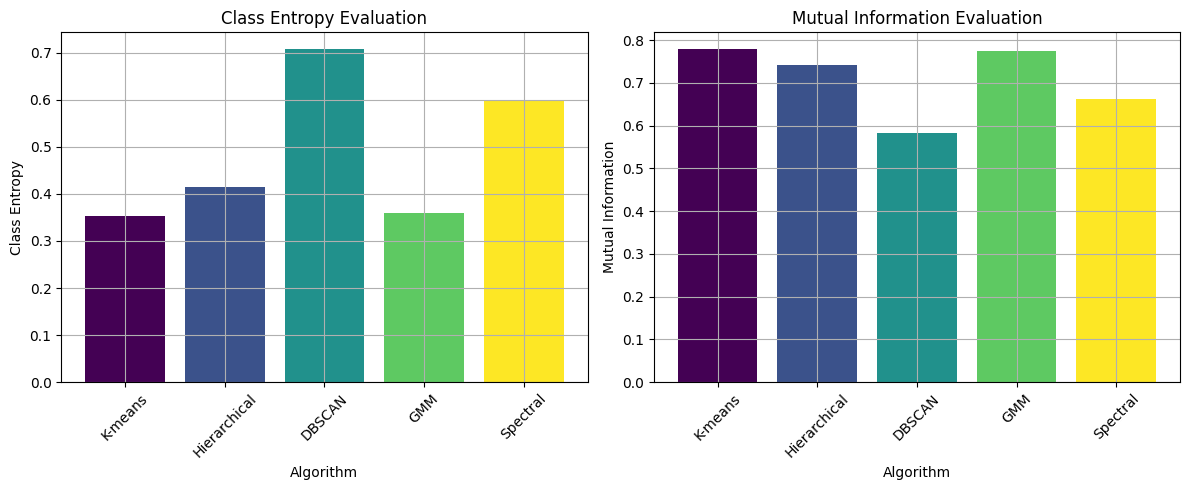

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import entropy

entropy_mi_results = pd.DataFrame(columns=['Algorithm', 'Class Entropy', 'Mutual Information'])

#Create a map that maps unique cluster labels to non-negative numbers
cluster_mapping = {cluster_label: idx for idx, cluster_label in enumerate(np.unique(results.values))}


for column in results.columns:
    labels = results[column].map(cluster_mapping)
    
    # counting class entropy
    def class_entropy(cluster_labels, category_labels):
        n = len(cluster_labels)
        unique_clusters = np.unique(cluster_labels)
        class_entropies = []
        for cluster in unique_clusters:
            mask = cluster_labels == cluster
            cluster_category_labels = category_labels[mask]
            class_entropy_value = entropy(np.bincount(cluster_category_labels))  # Użycie scipy.stats.entropy
            class_entropies.append(class_entropy_value * len(cluster_category_labels) / n)
        class_entropy_avg = np.sum(class_entropies)
        return class_entropy_avg
    
    class_entropy_value = class_entropy(labels, category_labels)
    
    # Counting Mutual Information
    mutual_information = normalized_mutual_info_score(category_labels, labels)
    
    entropy_mi_results = entropy_mi_results.append({'Algorithm': column, 'Class Entropy': class_entropy_value,
                                                    'Mutual Information': mutual_information},
                                                   ignore_index=True)

print(entropy_mi_results)

#-----------plot-----------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

cmap = cm.get_cmap("viridis", len(entropy_mi_results["Algorithm"]))

metrics_to_plot = ["Class Entropy", "Mutual Information"]
for idx, metric in enumerate(metrics_to_plot):
    ax = axs[idx]
    
    for i, algorithm in enumerate(entropy_mi_results["Algorithm"]):
        ax.bar(i, entropy_mi_results[metric][i], color=cmap(i))
    
    ax.set_xlabel("Algorithm")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} Evaluation")
    ax.set_xticks(range(len(entropy_mi_results["Algorithm"])))
    ax.set_xticklabels(entropy_mi_results["Algorithm"], rotation=45)
    ax.grid(True)
    ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


#### BCubed Precision, BCubed Recall, BCubed F1

In [18]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, jaccard_score, fowlkes_mallows_score
from sklearn.metrics import normalized_mutual_info_score
import numpy as np
from scipy.stats import entropy
from nltk.metrics.distance import edit_distance

results = df

evaluation_results = pd.DataFrame(columns=['Algorithm','BCubed Precision', 'BCubed Recall', 'BCubed F1'])

for column in results.columns:
    labels = results[column]
    
    
    def compute_bcubed_metrics(category_labels, cluster_labels):
        precision = 0.0
        num_samples = len(category_labels)
        for i in range(num_samples):
            same_cluster = (cluster_labels == cluster_labels[i])
            same_category = (category_labels == category_labels[i])
            precision += np.mean(same_category[same_cluster])
        precision /= num_samples
    
        recall = 0.0
        for i in range(num_samples):
            same_cluster = (cluster_labels == cluster_labels[i])
            same_category = (category_labels == category_labels[i])
            recall += np.mean(same_cluster[same_category])
        recall /= num_samples
    
        f1 = 2 * (precision * recall) / (precision + recall)
    
        return precision, recall, f1
    
    bcubed_precision, bcubed_recall, bcubed_f1 = compute_bcubed_metrics(category_labels, labels)
    
    evaluation_results = evaluation_results.append({'Algorithm': column, 'BCubed Precision': bcubed_precision, 'BCubed Recall': bcubed_recall, 'BCubed F1': bcubed_f1},
                                                   ignore_index=True)

print(evaluation_results)


C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2515036750.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Algorithm': column, 'BCubed Precision': bcubed_precision, 'BCubed Recall': bcubed_recall, 'BCubed F1': bcubed_f1},
C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2515036750.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Algorithm': column, 'BCubed Precision': bcubed_precision, 'BCubed Recall': bcubed_recall, 'BCubed F1': bcubed_f1},
C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2515036750.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Algorithm': co

      Algorithm  BCubed Precision  BCubed Recall  BCubed F1
0       K-means          0.842554       0.843897   0.843225
1  Hierarchical          0.803325       0.806769   0.805043
2        DBSCAN          0.567446       0.718688   0.634175
3           GMM          0.838535       0.838041   0.838288
4      Spectral          0.669859       0.797524   0.728138


C:\Users\julia\AppData\Local\Temp\ipykernel_19116\2515036750.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Algorithm': column, 'BCubed Precision': bcubed_precision, 'BCubed Recall': bcubed_recall, 'BCubed F1': bcubed_f1},


C:\Users\julia\AppData\Local\Temp\ipykernel_19116\106892575.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis", len(evaluation_results["Algorithm"]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


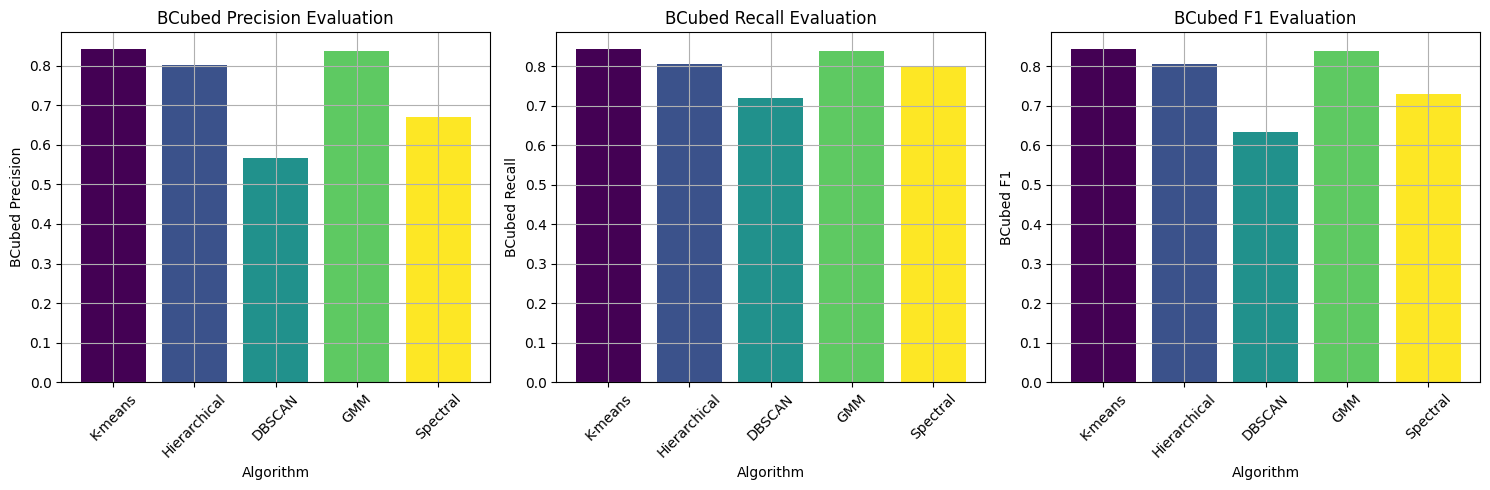

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cmap = cm.get_cmap("viridis", len(evaluation_results["Algorithm"]))
metrics_to_plot = ["BCubed Precision", "BCubed Recall", "BCubed F1"]

for idx, metric in enumerate(metrics_to_plot):
    ax = axs[idx]
    
    for i, algorithm in enumerate(evaluation_results["Algorithm"]):
        ax.bar(i, evaluation_results[metric][i], color=cmap(i))
    
    ax.set_xlabel("Algorithm")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} Evaluation")
    ax.set_xticks(range(len(evaluation_results["Algorithm"])))
    ax.set_xticklabels(evaluation_results["Algorithm"], rotation=45)
    ax.grid(True)
    ax.legend().set_visible(False)

plt.tight_layout()
plt.show()
